In [1]:
import pandas as pd
from plotting_utils import *
from plotting_BCs import *
from clustering_utils import *

Load data and plot BIC curves

In [2]:
gmm_results = pd.read_pickle('Data/BCs/Dataframes/gmm_pcaColor_2Components_features.pkl')
data = pd.read_pickle('Data/BCs/Dataframes/control_data.pkl')
assert len(data) == len(gmm_results['Predictions'].iloc[0])
final_results = bayes_factor(gmm_results)

In [3]:
final_results

,Seed,Covariance type,Nb components,Predictions,Bayes Factor
0,3,diag,50,"[7, 33, 30, 15, 30, 7, 6, 7, 6, 7, 34, 7, 33, ...","[29704.46978196071, 5727.535791010887, 4005.15..."
1,12,full,30,"[2, 20, 5, 2, 5, 2, 20, 2, 3, 2, 3, 2, 20, 2, ...","[9831.334117763705, 8805.112884345348, 4235.67..."
2,3,tied,50,"[28, 6, 28, 0, 30, 7, 6, 28, 3, 28, 34, 28, 6,...","[5105.000290560289, 1274.7912185121677, 1719.3..."
3,13,spherical,50,"[25, 34, 3, 3, 49, 25, 27, 3, 21, 25, 21, 25, ...","[17598.67753026003, 10550.462240482651, 4185.8..."


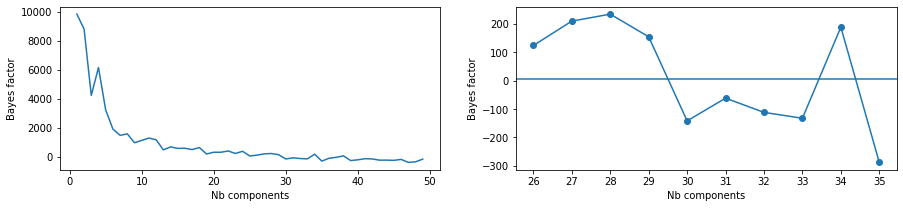

In [4]:
# Plot Bayes Factor

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50), final_results['Bayes Factor'].iloc[1])
plt.subplot(1,2,2)
plt.xlabel('Nb components')
plt.ylabel('Bayes factor')
plt.plot(np.arange(1,50)[25:35], final_results['Bayes Factor'].iloc[1][25:35], 'o-')
plt.axhline(6)
plt.xticks(np.arange(26,36))
plt.show()

Permute cluster IDs

In [5]:
data['cluster ID (full)'] = final_results['Predictions'].loc[final_results['Covariance type'] == 'full'].to_numpy()[0]
data['cluster ID (full)'] = permute_clusterIDs(data, 'cluster ID (full)')

Plot full clustering

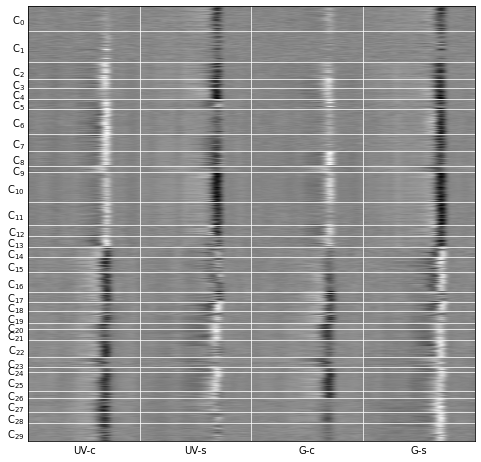

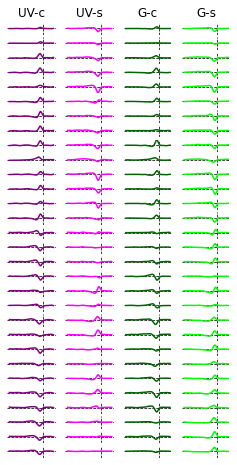

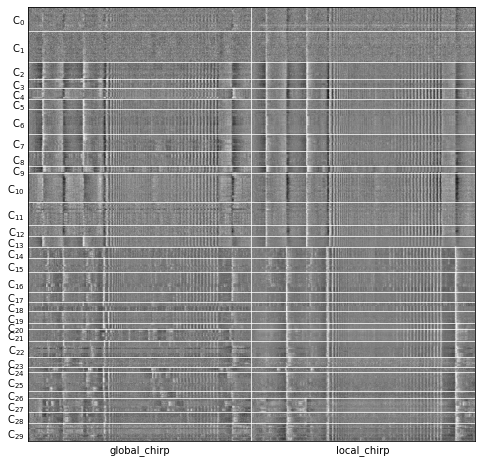

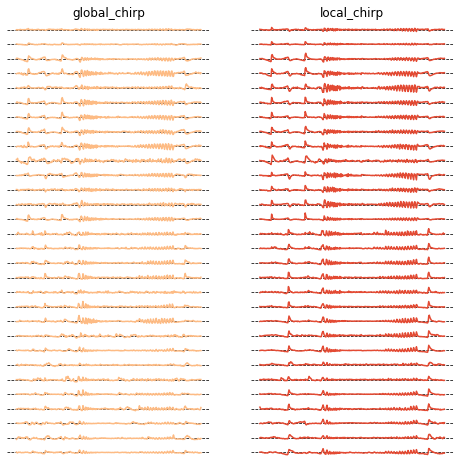

In [6]:
name = 'cluster ID (full)'

plot_Kernels(data, name)
plot_Chirp(data, name)